# **Vandermonde matrix.**

Coefficients: [0. 0. 2. 0.]
P(1) = 2.0


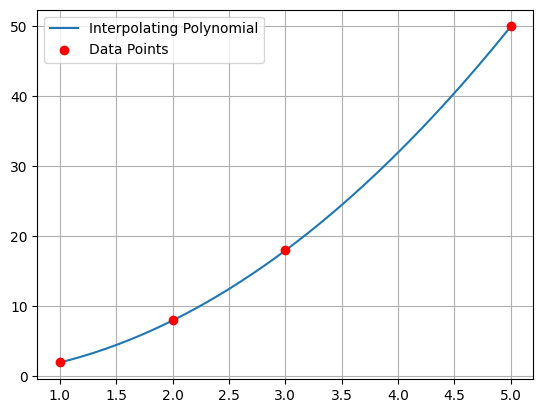

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
X = np.array([1, 2, 3, 5], dtype=float)
Y = np.array([2, 8, 18, 50], dtype=float)
n = len(X)

# Construct Vandermonde matrix
V = np.vander(X, increasing=True)

# Solve for coefficients a0, a1, ..., an-1
coeffs = np.linalg.solve(V, Y)
print("Coefficients:", coeffs)

# Polynomial evaluation function
def poly_eval(x, coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

# Test evaluation at x=1
px = 1
py = poly_eval(px, coeffs)
print(f"P({px}) = {py}")

# Plot
x_vals = np.linspace(1, 5, 200)
y_vals = [poly_eval(x, coeffs) for x in x_vals]

plt.plot(x_vals, y_vals, label="Interpolating Polynomial")
plt.scatter(X, Y, color="red", zorder=5, label="Data Points")
plt.legend()
plt.grid(True)
plt.show()


# **Lagrange polynomial**

In [12]:
import sympy as sp

# Define variables
x = sp.symbols('x')
X = [1, 2, 3, 5]
Y = [2, 8, 18, 50]
n = len(X)

# Build Lagrange polynomial
P = 0
for i in range(n):
    L = 1
    for j in range(n):
        if i != j:
            L *= (x - X[j]) / (X[i] - X[j])
    P += Y[i] * L

# Simplify
P_simplified = sp.expand(P)
print("Lagrange Polynomial:", P_simplified)


Lagrange Polynomial: 2*x**2


# **Hermite interpolation Method**

In [13]:
import sympy as sp

# Symbol
x = sp.symbols('x')

# Data points (x, f(x), f'(x))
points = [
    (0, 1, 0),         # f(0)=1, f'(0)=0
    (1, sp.E, sp.E)    # f(1)=e, f'(1)=e
]

# Hermite basis construction
H = 0
for (xi, yi, ypi) in points:
    # Lagrange basis for value
    Li = 1
    for (xj, _, _) in points:
        if xj != xi:
            Li *= (x - xj) / (xi - xj)

    # Derivative of Lagrange basis
    dLi = sp.diff(Li, x)

    # Hermite polynomial contribution
    Hi = (1 - 2*(x - xi)*dLi.subs(x, xi)) * (Li**2) * yi \
         + (x - xi) * (Li**2) * ypi

    H += Hi

# Simplify polynomial
H_poly = sp.expand(H)
print("Hermite Interpolating Polynomial:", H_poly)


Hermite Interpolating Polynomial: -E*x**3 + 2*x**3 - 3*x**2 + 2*E*x**2 + 1


# **Richardson Extrapolation**

In [14]:
import numpy as np

def f(x): return np.sin(x)

h = 0.1
D1 = (f(1+h) - f(1-h)) / (2*h)      # O(h^2) approx
D2 = (f(1+h/2) - f(1-h/2)) / (h)    # finer step
D = D2 + (D2 - D1) / (2**2 - 1)     # Richardson Extrapolation
print("Derivative at x=1:", D)


Derivative at x=1: 0.5403021933386563


# **Least Squares Method**

In [15]:
import numpy as np

x = np.array([0,1,2,3,4,5])
y = np.array([2.1, 2.9, 4.2, 5.1, 6.8, 8.2])

A = np.vstack([x, np.ones(len(x))]).T
a, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(f"y ≈ {a:.2f}x + {b:.2f}")


y ≈ 1.23x + 1.80


# **Gaussian Elimination**

In [16]:
import numpy as np

A = np.array([[2,1,-1],[ -3,-1,2],[ -2,1,2]], float)
b = np.array([8,-11,-3], float)

x = np.linalg.solve(A,b)
print("Solution:", x)


Solution: [ 2.  3. -1.]


# **LU Decomposition**

In [17]:
import numpy as np
from scipy.linalg import lu

A = np.array([[2,1,1],[4,-6,0],[-2,7,2]])
P, L, U = lu(A)
print("L=\n",L,"\nU=\n",U)


L=
 [[ 1.   0.   0. ]
 [ 0.5  1.   0. ]
 [-0.5  1.   1. ]] 
U=
 [[ 4. -6.  0.]
 [ 0.  4.  1.]
 [ 0.  0.  1.]]


# ***Newton-Raphson Method***

In [18]:
def f(x): return x**3 - x - 2
def df(x): return 3*x**2 - 1

x = 1.5
for _ in range(5):
    x = x - f(x)/df(x)
print("Root:", x)


Root: 1.5213797068045676


# **Numerical Integration (Trapezoidal Rule)**

In [19]:
import numpy as np

f = np.exp
a, b, n = 0, 1, 100
x = np.linspace(a,b,n+1)
y = f(x)
I = (b-a)/n * (0.5*y[0] + sum(y[1:-1]) + 0.5*y[-1])
print("Integral ≈", I)


Integral ≈ 1.7182961474504175


# **QR Decomposition**

In [20]:
import numpy as np

A = np.array([[1,1],[1,2],[1,3]], float)
b = np.array([1,2,2], float)

Q,R = np.linalg.qr(A)
x = np.linalg.solve(R, Q.T @ b)
print("Solution:", x)


Solution: [0.66666667 0.5       ]


# **Secant Method**

In [21]:
def f(x): return x**3 - x - 2

x0, x1 = 1, 2
for _ in range(5):
    x2 = x1 - f(x1)*(x1-x0)/(f(x1)-f(x0))
    x0, x1 = x1, x2
print("Root:", x1)


Root: 1.5213763166697438


# **Bisection Method**

In [22]:
def f(x): return x**3 - x - 2

a, b = 1, 2
for _ in range(20):
    c = (a+b)/2
    if f(c)*f(a) < 0:
        b = c
    else:
        a = c
print("Root:", c)


Root: 1.5213804244995117
